In [2]:
%%markdown
## Resources
USDA data: https://fdc.nal.usda.gov/download-datasets.html

USDA schema: https://fdc.nal.usda.gov/portal-data/external/dataDictionary

GHG emissions by use: https://ourworldindata.org/food-choice-vs-eating-local

Article on CO2 emissions per calorie: https://academic.oup.com/ajcn/article/101/1/184/4564263

## Resources
USDA data: https://fdc.nal.usda.gov/download-datasets.html

USDA schema: https://fdc.nal.usda.gov/portal-data/external/dataDictionary

GHG emissions by use: https://ourworldindata.org/food-choice-vs-eating-local

Article on CO2 emissions per calorie: https://academic.oup.com/ajcn/article/101/1/184/4564263


In [38]:
import pandas as pd
import numpy as np
import requests
from envs import env
import json
from dataclasses import dataclass

In [156]:
GHG_EMISSIONS_DF = pd.read_csv('./data/ghg/GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv')
GHG_EMISSIONS_DF = GHG_EMISSIONS_DF.rename(columns=lambda column: column.replace(' ', '_').lower()).drop(columns='unnamed:_8')
GHG_EMISSIONS_DF

,food_product,land_use_change,animal_feed,farm,processing,transport,packging,retail
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0


In [157]:
USDA_FOOD_DF = pd.read_csv('./data/usda/food.csv')

In [158]:
USDA_FOOD_NUTRIENT_DF = pd.read_csv('./data/usda/food_nutrient.csv')
USDA_NUTRIENT_DF = pd.read_csv('./data/usda/nutrient.csv')
USDA_NUTRIENT_DF


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,unit_name,nutrient_nbr,rank
0,1002,Nitrogen,G,202.0,500.0
1,1003,Protein,G,203.0,600.0
2,1004,Total lipid (fat),G,204.0,800.0
3,1005,"Carbohydrate, by difference",G,205.0,1110.0
4,1007,Ash,G,207.0,1000.0
...,...,...,...,...,...
227,2025,22:6 c,G,839.0,15250.0
228,2026,20:2 c,G,840.0,14250.0
229,2028,trans-beta-Carotene,UG,321.2,7444.0
230,2029,trans-Lycopene,UG,337.2,7534.0


In [ ]:
# create mapping of GHG food groups to FDC IDs
@dataclass
class GHG_FDC_Map:
    ghg_product_name: str
    fdc_id: int
    notes: str = ""

with open('./ghg-fdc-mapping.json', 'r') as f:
    mappings = json.load(f)

GHG_FDC_MAPPING = []
for mapping in mappings:
    if mapping['fdc_id']:
        GHG_FDC_MAPPING.append(GHG_FDC_Map(**mapping))


In [161]:
@dataclass
class Food:
    emissions: pd.DataFrame
    name: str
    nutrients: pd.DataFrame
    macro_nutrient_emissions: pd.DataFrame

@dataclass
class Macro:
    name: str
    g_to_kcal: int
    usda_name: str

food_dicts = []
food_df = None
PROTEIN = 'Protein'
FAT = 'Fat'
CARB = 'Carbohydrate'
ENERGY = 'Energy'
KCAL = 'KCAL'
MACROS = {
    'Carbohydrate, by difference':
        Macro(
            name=CARB,
            g_to_kcal=4,
            usda_name='Carbohydrate, by difference'
        ),
    'Total lipid (fat)':
        Macro(
            name=FAT,
            g_to_kcal=9,
            usda_name='Total lipid (fat)'
        ),
    'Protein':
        Macro(
            name=PROTEIN,
            g_to_kcal=4,
            usda_name='Protein'
        ),
}
USDA_MACRO_NAMES = MACROS.keys()
EMISSIONS = ['land_use_change','animal_feed','farm','processing','transport', 'packging', 'retail']




def add_macro_in_kcal(df, amount_per_kg_col=None, amount_per_kcal_col=None):
    df_new = df.copy()
    for macro in USDA_MACRO_NAMES:
        macro_loc = df.nutrient_name == macro
        df_new.loc[macro_loc, amount_per_kcal_col] = df_new.loc[macro_loc, amount_per_kg_col] * MACROS[macro].g_to_kcal

    return df_new

def get_total_energy_in_kcal(df, nutrient_name_col=None, nutrient_unit_name_col=None, nutrient_amount_per_kg_col=None):
    energy = df.loc[
            (df[nutrient_name_col] == ENERGY) & 
            (df[nutrient_unit_name_col] == KCAL), 
            nutrient_amount_per_kg_col
           ].iloc[0]
    return energy
    
def add_product_name(df, product_name_col=None, product_name=None):
    df_new = df.copy()
    df_new['product_name'] = mapping.ghg_product_name
    return df_new


def convert_grams_in_100s_to_kg(df, nutrient_amount_per_100g_col='nutrient_amount_per_100g', nutrient_amount_per_kg_col='nutrient_amount_per_kg'):
    df_new = df.copy()
    df_new[nutrient_amount_per_kg_col] = df_new[nutrient_amount_per_100g_col] * 10
    return df_new

def save_artifact(df, filepath):

    df.to_csv(filepath, index=False)

def subset_by_nutrients(df, nutrient_name_col='nutrient_name', nutrients=[]):

    return df.loc[df[nutrient_name_col].isin(nutrients)]

def add_fraction_of_total_energy(df, 
    total_energy_in_kcal=None, 
    fraction_of_total_energy_col='nutrient_fraction_of_total_energy', 
    nutrient_amount_in_kcal_col='nutrient_amount_in_kcal'
):
    df_new = df.copy()
    df_new[fraction_of_total_energy_col] = df_new[nutrient_amount_in_kcal_col].divide(total_energy_in_kcal)
    return df_new

def build_emissions_df_from_product_name(product_name=None):
     return GHG_EMISSIONS_DF.loc[GHG_EMISSIONS_DF['food_product'] == product_name]

def join_nutrients_with_emissions(emissions_df, nutrients_df):
    return pd.merge(nutrients_df, emissions_df, left_on='product_name', right_on='food_product').drop(columns='food_product')

def add_nutrient_emission_efficiency(df, nutrient_fraction_of_total_energy_col=None):
    df_new = df.copy()
    new_cols = [f'{emission}_nutrient_emission_efficiency' for emission in EMISSIONS]

    # land_use_change in kg CO2 / kg product
    # nutrient fraction of total energy = (kcal macro / kcal total energy)
    df_new[new_cols] = df_new[EMISSIONS].divide(df_new[nutrient_fraction_of_total_energy_col], axis=0)

    df_new['nutrient_emission_efficiency_units'] = '(kg CO2 / kg product) / (kcal macro / kcal total energy)'
    return df_new

def build_nutrients_df_from_fdc_id(fdc_id):
    df = USDA_FOOD_DF.loc[df_food['fdc_id'] == fdc_id]
    df = pd.merge(df, USDA_FOOD_NUTRIENT_DF, how='left', on='fdc_id')[['fdc_id', 'description', 'nutrient_id', 'amount']]
    df = pd.merge(df, USDA_NUTRIENT_DF, left_on='nutrient_id', right_on='id')[['fdc_id', 'description', 'nutrient_id', 'amount', 'name', 'unit_name', 'nutrient_nbr']]
    df = df.rename(columns={'amount': 'nutrient_amount_per_100g', 'name': 'nutrient_name', 'unit_name': 'nutrient_unit_name'})

    return df

for mapping in GHG_FDC_MAPPING:

    nutrients_df = build_nutrients_df_from_fdc_id(mapping.fdc_id)
    nutrients_df = convert_grams_in_100s_to_kg(nutrients_df, nutrient_amount_per_100g_col='nutrient_amount_per_100g', nutrient_amount_per_kg_col='nutrient_amount_per_kg')
    nutrients_df = add_product_name(nutrients_df, product_name_col='product_name', product_name=mapping.ghg_product_name)
    save_artifact(nutrients_df, 'data/artifacts/food-nutrients-{mapping.ghg_product_name}.csv')
    
    
    total_energy_in_kcal = get_total_energy_in_kcal(
        nutrients_df, 
        nutrient_name_col='nutrient_name', 
        nutrient_unit_name_col='nutrient_unit_name', 
        nutrient_amount_per_kg_col='nutrient_amount_per_kg'
    )


    macro_nutrients_df = subset_by_nutrients(nutrients_df, nutrient_name_col='nutrient_name', nutrients=USDA_MACRO_NAMES)

    macro_nutrients_df = add_macro_in_kcal(macro_nutrients_df, amount_per_kg_col='nutrient_amount_per_kg', amount_per_kcal_col='nutrient_amount_in_kcal')
    

    macro_nutrients_df = add_fraction_of_total_energy(
        macro_nutrients_df, 
        total_energy_in_kcal=total_energy_in_kcal, 
        nutrient_amount_in_kcal_col='nutrient_amount_in_kcal',
        fraction_of_total_energy_col='nutrient_fraction_of_total_energy', 
    )
    emissions_df = build_emissions_df_from_product_name(product_name=mapping.ghg_product_name)
    macro_nutrient_emissions_df = join_nutrients_with_emissions(emissions_df=emissions_df, nutrients_df=macro_nutrients_df,)
    macro_nutrient_emissions_df = add_nutrient_emission_efficiency(macro_nutrient_emissions_df, nutrient_fraction_of_total_energy_col='nutrient_fraction_of_total_energy')

    if food_df is None:
        food_df = macro_nutrient_emissions_df
    else:
        food_df = pd.concat([food_df, macro_nutrient_emissions_df])

    food_dict = Food(
        emissions=emissions,
        nutrients=macro_nutrients_df,
        name=mapping.ghg_product_name,
        macro_nutrient_emissions=macro_nutrient_emissions_df
    )
    food_dicts.append(food_dict)

food_df

,fdc_id,description,nutrient_id,nutrient_amount_per_100g,nutrient_name,nutrient_unit_name,nutrient_nbr,nutrient_amount_per_kg,product_name,nutrient_amount_in_kcal,...,packging,retail,land_use_change_nutrient_emission_efficiency,animal_feed_nutrient_emission_efficiency,farm_nutrient_emission_efficiency,processing_nutrient_emission_efficiency,transport_nutrient_emission_efficiency,packging_nutrient_emission_efficiency,retail_nutrient_emission_efficiency,nutrient_emission_efficiency_units
0,335240,"Bread, whole-wheat, commercially prepared",1004,3.55,Total lipid (fat),G,204.0,35.5,Wheat & Rye (Bread),319.5,...,0.1,0.1,0.794992,0.000000,6.359937,1.589984,0.794992,0.794992,0.794992,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,335240,"Bread, whole-wheat, commercially prepared",1005,43.10,"Carbohydrate, by difference",G,205.0,431.0,Wheat & Rye (Bread),1724.0,...,0.1,0.1,0.147332,0.000000,1.178654,0.294664,0.147332,0.147332,0.147332,(kg CO2 / kg product) / (kcal macro / kcal tot...
2,335240,"Bread, whole-wheat, commercially prepared",1003,12.30,Protein,G,203.0,123.0,Wheat & Rye (Bread),492.0,...,0.1,0.1,0.516260,0.000000,4.130081,1.032520,0.516260,0.516260,0.516260,(kg CO2 / kg product) / (kcal macro / kcal tot...
0,168921,"Corn flour, whole-grain, blue (harina de maiz ...",1003,8.75,Protein,G,203.0,87.5,Maize (Meal),350.0,...,0.1,0.0,3.120000,0.000000,5.200000,1.040000,1.040000,1.040000,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,168921,"Corn flour, whole-grain, blue (harina de maiz ...",1004,5.09,Total lipid (fat),G,204.0,50.9,Maize (Meal),458.1,...,0.1,0.0,2.383759,0.000000,3.972932,0.794586,0.794586,0.794586,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,175165,"Fish, catfish, channel, farmed, raw",1003,15.23,Protein,G,203.0,152.3,Fish (farmed),609.2,...,0.1,0.0,0.976691,1.562705,7.032173,0.000000,0.195338,0.195338,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
2,175165,"Fish, catfish, channel, farmed, raw",1005,0.00,"Carbohydrate, by difference",G,205.0,0.0,Fish (farmed),0.0,...,0.1,0.0,inf,inf,inf,NaN,inf,inf,NaN,(kg CO2 / kg product) / (kcal macro / kcal tot...
0,175179,"Crustaceans, shrimp, raw",1004,0.51,Total lipid (fat),G,204.0,5.1,Shrimps (farmed),45.9,...,0.3,0.2,3.703704,46.296296,155.555556,0.000000,3.703704,5.555556,3.703704,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,175179,"Crustaceans, shrimp, raw",1005,0.00,"Carbohydrate, by difference",G,205.0,0.0,Shrimps (farmed),0.0,...,0.3,0.2,inf,inf,inf,NaN,inf,inf,inf,(kg CO2 / kg product) / (kcal macro / kcal tot...


In [163]:
food_df

,fdc_id,description,nutrient_id,nutrient_amount_per_100g,nutrient_name,nutrient_unit_name,nutrient_nbr,nutrient_amount_per_kg,product_name,nutrient_amount_in_kcal,...,packging,retail,land_use_change_nutrient_emission_efficiency,animal_feed_nutrient_emission_efficiency,farm_nutrient_emission_efficiency,processing_nutrient_emission_efficiency,transport_nutrient_emission_efficiency,packging_nutrient_emission_efficiency,retail_nutrient_emission_efficiency,nutrient_emission_efficiency_units
0,335240,"Bread, whole-wheat, commercially prepared",1004,3.55,Total lipid (fat),G,204.0,35.5,Wheat & Rye (Bread),319.5,...,0.1,0.1,0.794992,0.000000,6.359937,1.589984,0.794992,0.794992,0.794992,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,335240,"Bread, whole-wheat, commercially prepared",1005,43.10,"Carbohydrate, by difference",G,205.0,431.0,Wheat & Rye (Bread),1724.0,...,0.1,0.1,0.147332,0.000000,1.178654,0.294664,0.147332,0.147332,0.147332,(kg CO2 / kg product) / (kcal macro / kcal tot...
2,335240,"Bread, whole-wheat, commercially prepared",1003,12.30,Protein,G,203.0,123.0,Wheat & Rye (Bread),492.0,...,0.1,0.1,0.516260,0.000000,4.130081,1.032520,0.516260,0.516260,0.516260,(kg CO2 / kg product) / (kcal macro / kcal tot...
0,168921,"Corn flour, whole-grain, blue (harina de maiz ...",1003,8.75,Protein,G,203.0,87.5,Maize (Meal),350.0,...,0.1,0.0,3.120000,0.000000,5.200000,1.040000,1.040000,1.040000,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,168921,"Corn flour, whole-grain, blue (harina de maiz ...",1004,5.09,Total lipid (fat),G,204.0,50.9,Maize (Meal),458.1,...,0.1,0.0,2.383759,0.000000,3.972932,0.794586,0.794586,0.794586,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,175165,"Fish, catfish, channel, farmed, raw",1003,15.23,Protein,G,203.0,152.3,Fish (farmed),609.2,...,0.1,0.0,0.976691,1.562705,7.032173,0.000000,0.195338,0.195338,0.000000,(kg CO2 / kg product) / (kcal macro / kcal tot...
2,175165,"Fish, catfish, channel, farmed, raw",1005,0.00,"Carbohydrate, by difference",G,205.0,0.0,Fish (farmed),0.0,...,0.1,0.0,inf,inf,inf,NaN,inf,inf,NaN,(kg CO2 / kg product) / (kcal macro / kcal tot...
0,175179,"Crustaceans, shrimp, raw",1004,0.51,Total lipid (fat),G,204.0,5.1,Shrimps (farmed),45.9,...,0.3,0.2,3.703704,46.296296,155.555556,0.000000,3.703704,5.555556,3.703704,(kg CO2 / kg product) / (kcal macro / kcal tot...
1,175179,"Crustaceans, shrimp, raw",1005,0.00,"Carbohydrate, by difference",G,205.0,0.0,Shrimps (farmed),0.0,...,0.3,0.2,inf,inf,inf,NaN,inf,inf,inf,(kg CO2 / kg product) / (kcal macro / kcal tot...


In [164]:
def remove_nans_and_infs(df):
    return df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


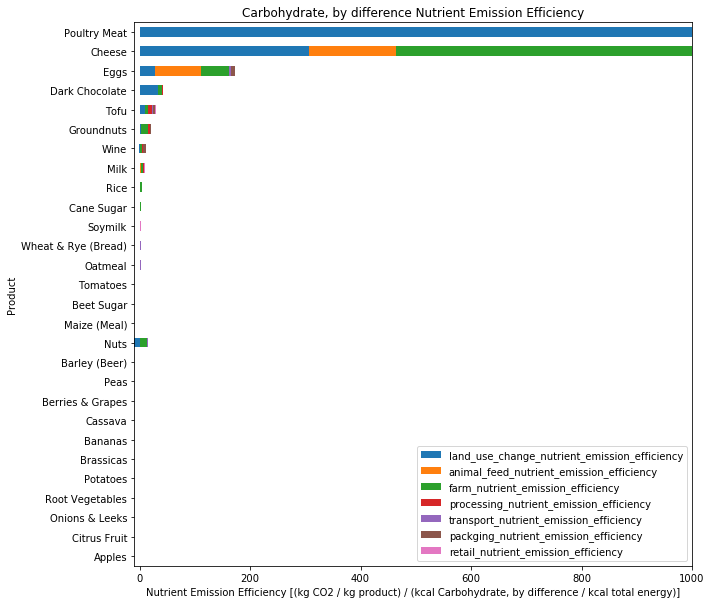

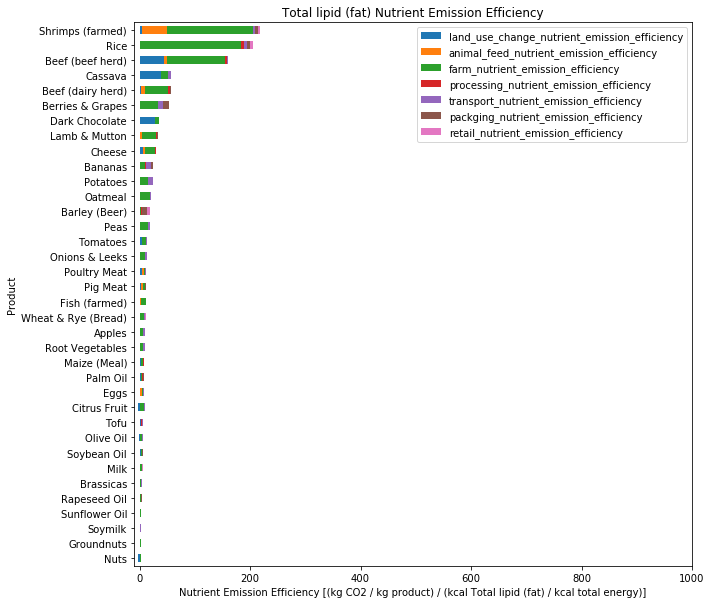

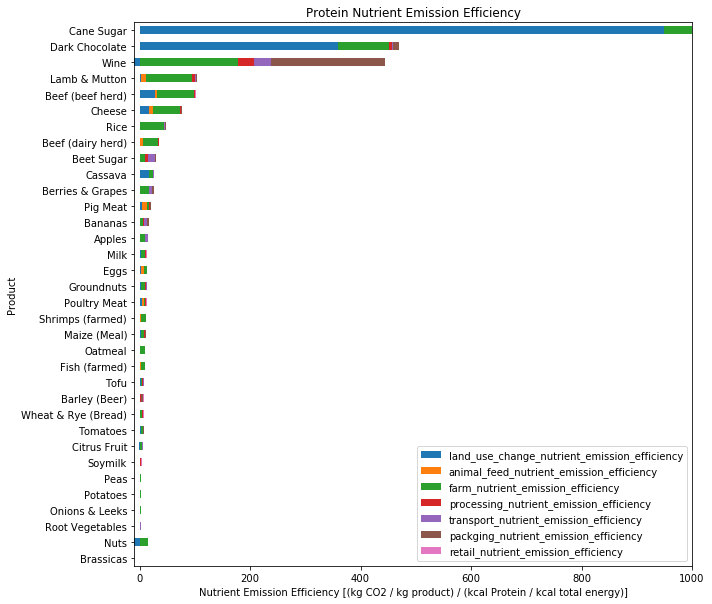

In [170]:
EMISSION_COLUMNS_TO_PLOT = [
    'land_use_change_nutrient_emission_efficiency',
    'animal_feed_nutrient_emission_efficiency',
    'farm_nutrient_emission_efficiency',
    'processing_nutrient_emission_efficiency',
    'transport_nutrient_emission_efficiency',
    'packging_nutrient_emission_efficiency',
    'retail_nutrient_emission_efficiency'
]
macros = dict()
for macro in MACROS:
    macros[macro] = food_df.loc[food_df['nutrient_name'] == macro]

    to_plot = macros[macro][BARS_TO_PLOT + ['product_name']]
    to_plot = remove_nans_and_infs(to_plot)
    total = to_plot.sum(axis=1)
    to_plot = to_plot.iloc[total.argsort()]

    to_plot = to_plot.set_index('product_name')
    ax = to_plot.plot.barh(stacked=True, title=f'{macro} Nutrient Emission Efficiency', figsize=(10, 10), xlim=(-10, 1000))
    ax.set_xlabel(f'Nutrient Emission Efficiency [(kg CO2 / kg product) / (kcal {macro} / kcal total energy)]')
    ax.set_ylabel('Product')


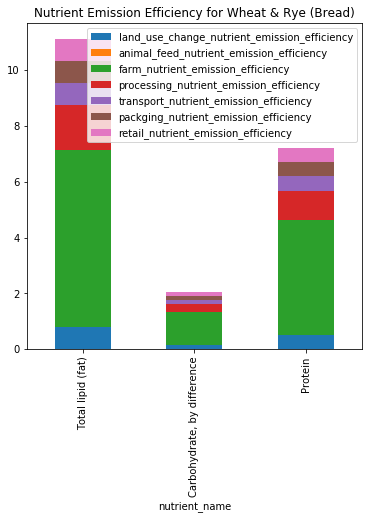

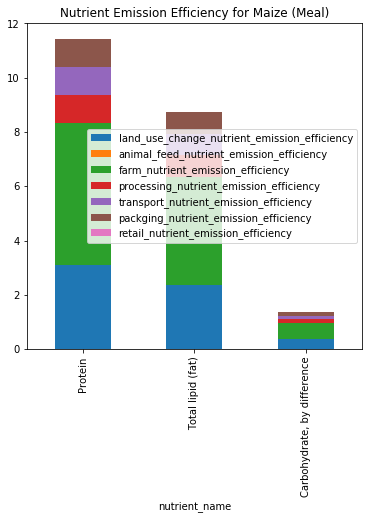

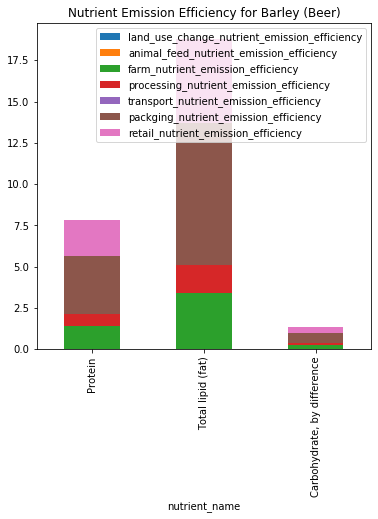

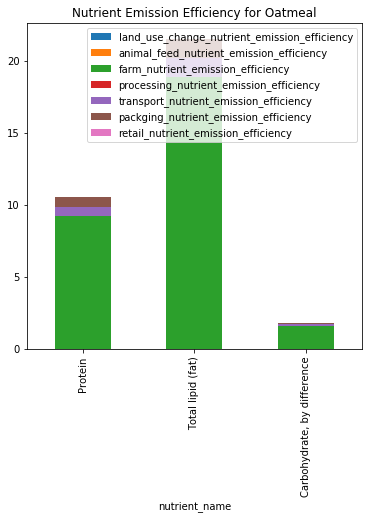

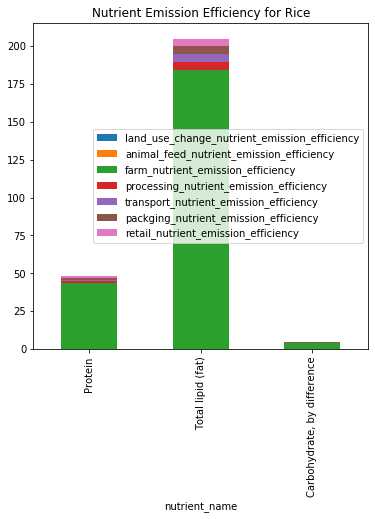

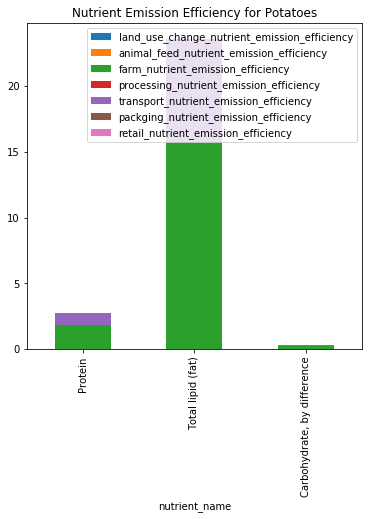

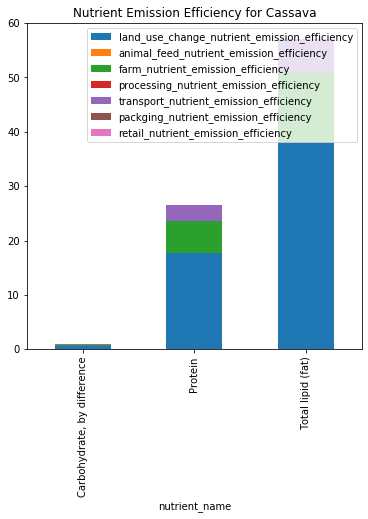

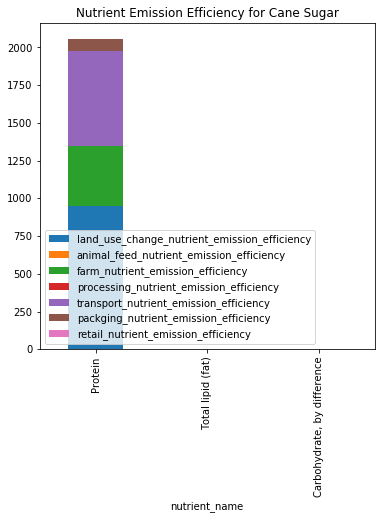

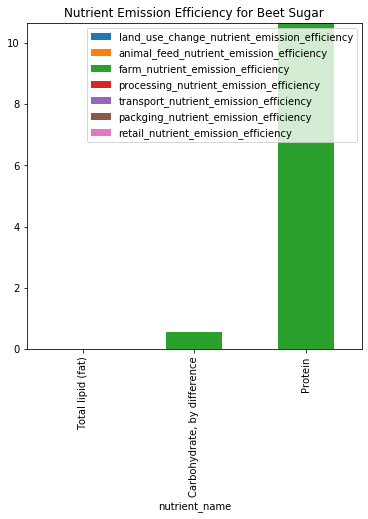

In [175]:
for food in food_dicts:
    to_plot = food.macro_nutrient_emissions[BARS_TO_PLOT + ['nutrient_name']]
    
    to_plot = to_plot.set_index('nutrient_name',)
    to_plot.plot.bar(stacked=True, title=f'Nutrient Emission Efficiency for {food.name}', figsize=(6,6))
    ax.set_ylabel(f'Nutrient Emission Efficiency [(kg CO2 / kg product) / (kcal {macro} / kcal total energy)]')
    ax.set_xlabel('Macro Nutrient')